In [22]:
#Import necessary  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [23]:
#Import data
data=pd.read_csv("C:/Users/hp/Downloads/cereal.csv")
data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [3]:
# Explore the first few rows of the dataset
print(data.head())

                        name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843  


In [4]:
# Check for missing values
print(data.isnull().sum())

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


In [5]:
# Summarize the dataset
print(data.describe())

         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.597403   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.278956   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  77.000000   77.000000   77.000000  77.000000  77.000000  77.000000   
mean    6.922078   96.077922   28.246753   2.207792   1.029610   0.821039   
std     4.444885   71.286813   22.342523   0.832524   0.150477   0.232716  

In [6]:
# Split the data into features and target variable
X = data.iloc[:,3:15]
X

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
72,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75
73,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00
74,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67
75,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00


In [7]:
y=data['rating']
y

0     68.402973
1     33.983679
2     59.425505
3     93.704912
4     34.384843
        ...    
72    39.106174
73    27.753301
74    49.787445
75    51.592193
76    36.187559
Name: rating, Length: 77, dtype: float64

In [8]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [11]:
#Evaluating the Algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# predicting the accuracy score
score=r2_score(y_test,y_pred)
print("r2 score is ",score*100,"%")

Mean Absolute Error: 2.5918315094131117e-07
Mean Squared Error: 9.738440445204445e-14
Root Mean Squared Error: 3.1206474400682376e-07
r2 score is  99.99999999999996 %


Text(0.5, 1.0, 'Overall Cereals Distribution')

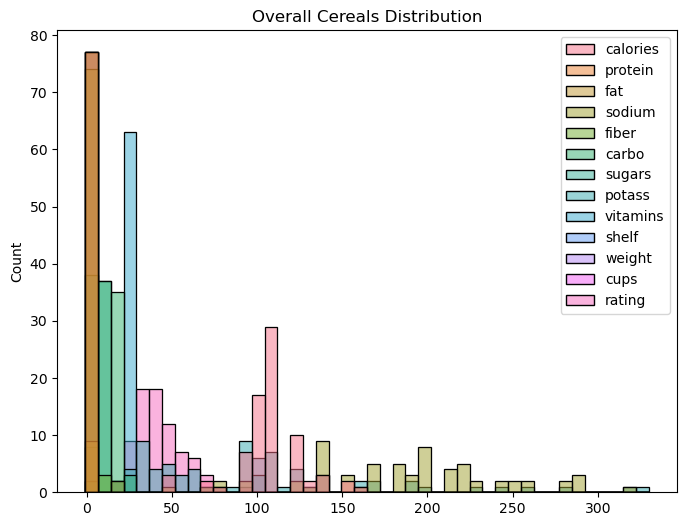

In [12]:
#Overall distribution of data
plt.figure(figsize=(8,6))
sns.histplot(data)
plt.title("Overall Cereals Distribution")

Text(0.5, 1.0, ' Distribution of Manufacturer')

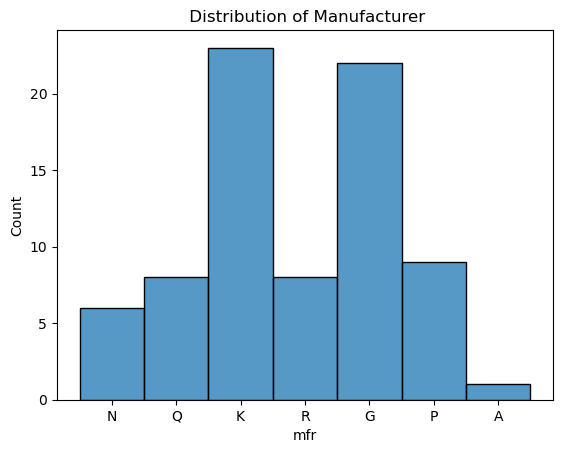

In [13]:
#Distribution of Manufacturer
sns.histplot(data['mfr'])
plt.title(" Distribution of Manufacturer")

Text(0.5, 1.0, 'Distribution of Type')

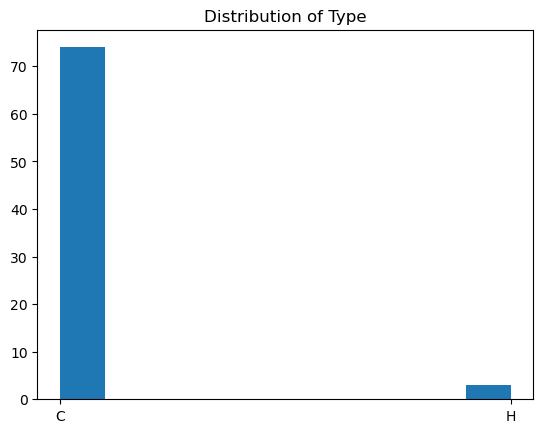

In [14]:
#Distribution of Cereal Type
plt.hist(data['type'])
plt.title("Distribution of Type")

Text(0.5, 1.0, 'Distribution of Calories')

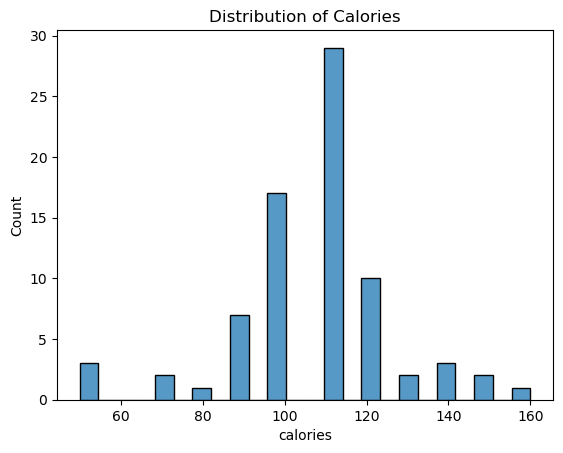

In [15]:
#Distribution of Calories
sns.histplot(data['calories'])
plt.title("Distribution of Calories")

Text(0.5, 1.0, 'Distribution of Protein')

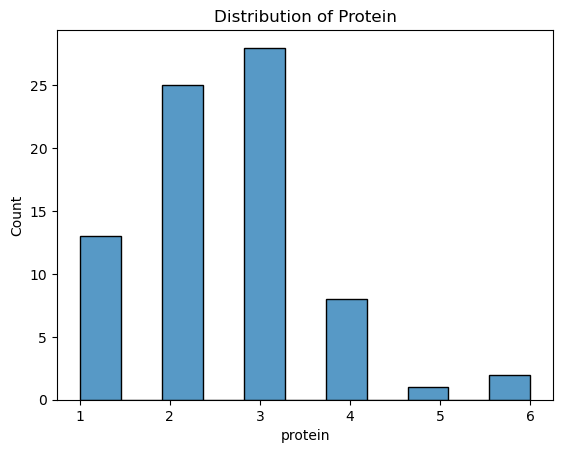

In [16]:
#Distribution of Protein
sns.histplot(data['protein'])
plt.title("Distribution of Protein")

Text(0.5, 1.0, 'Distribution of Fat')

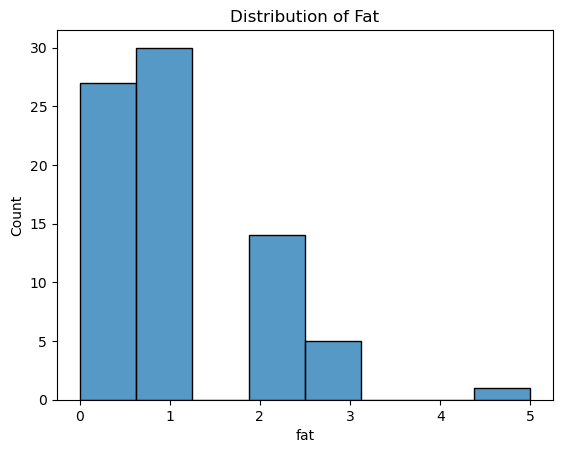

In [17]:
#Distribution of Fat
sns.histplot(data['fat'])
plt.title("Distribution of Fat")

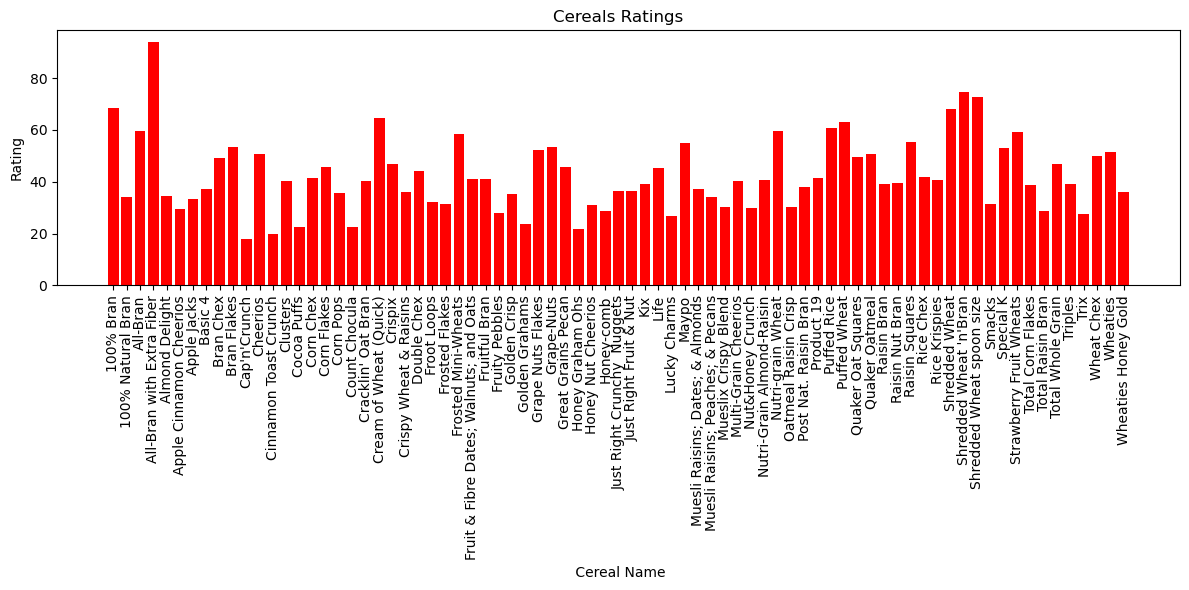

In [18]:
#Relation between Cereals and its Ratings
plt.figure(figsize=(12,6))
plt.bar(data['name'],data['rating'],color='red')
plt.xlabel(" Cereal Name")
plt.ylabel("Rating")
plt.title("Cereals Ratings")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

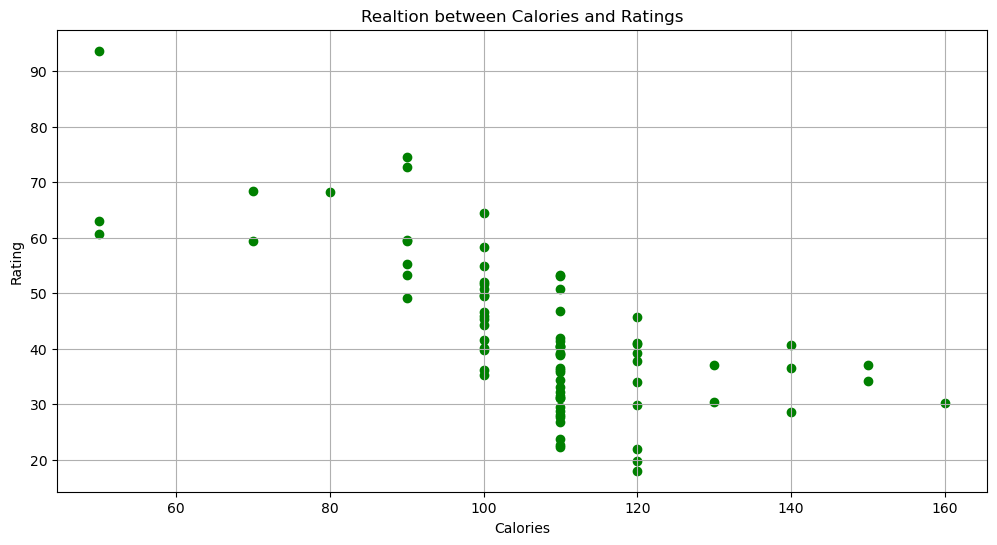

In [19]:
#Relation between Calories and its Ratings
plt.figure(figsize=(12,6))
plt.scatter(data['calories'],data['rating'],color='green')
plt.xlabel("Calories")
plt.ylabel("Rating")
plt.title("Realtion between Calories and Ratings")
plt.grid(True)
plt.show()

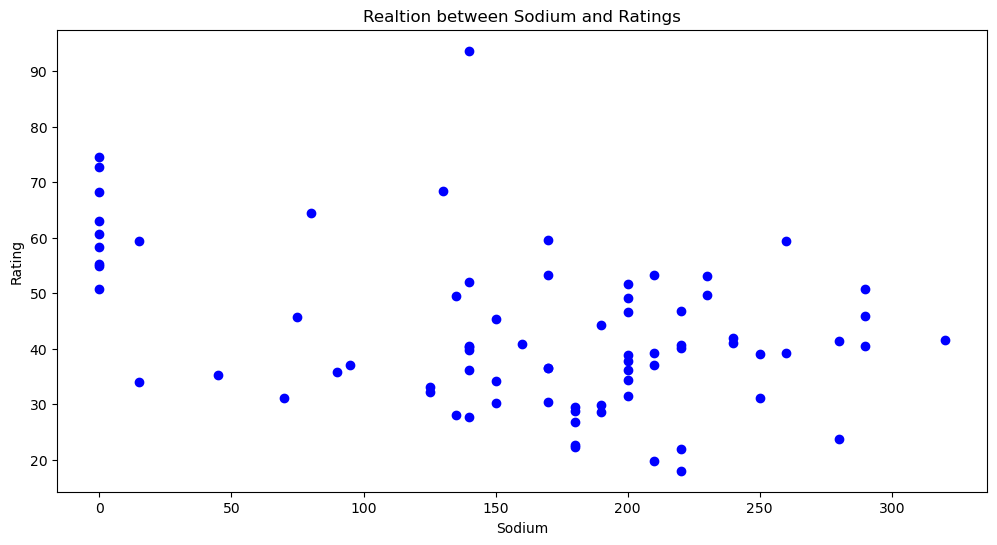

In [20]:
#Relation between Sodium and its Ratings
plt.figure(figsize=(12,6))
plt.scatter(data['sodium'], data['rating'],marker='o', color='blue', linestyle='-')
plt.xlabel("Sodium")
plt.ylabel("Rating")
plt.title("Realtion between Sodium and Ratings")
plt.show()

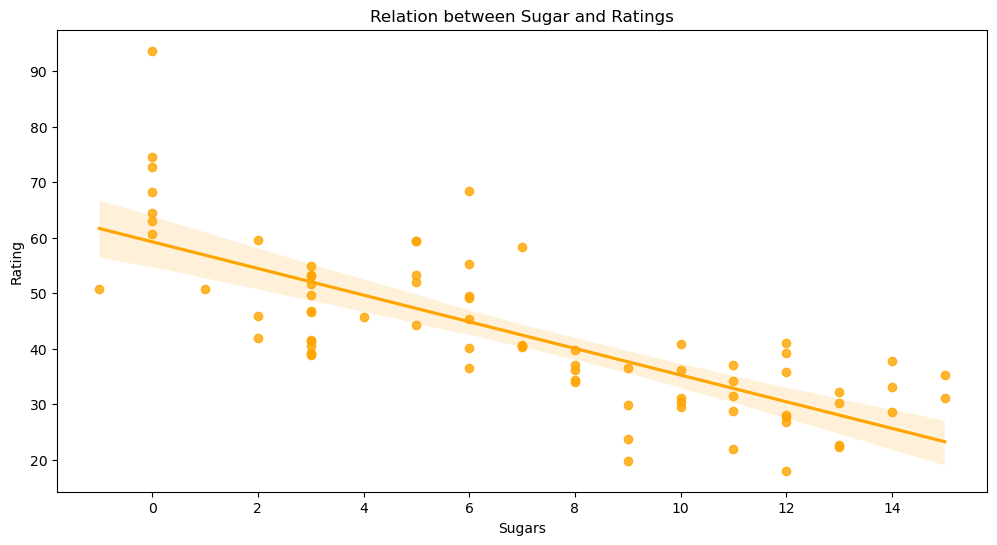

In [21]:
#Relation between Sugar and its Ratings
plt.figure(figsize=(12,6))
sns.regplot(data=data, x='sugars', y='rating',color='orange')
plt.xlabel("Sugars")
plt.ylabel("Rating")
plt.title("Relation between Sugar and Ratings")
plt.show()